In [ ]:
#step1:import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#step2:load the datasets-> head,tail,info,columns
data=pd.read_csv("linear_regression_datasest.csv")
data.head()

,Feature_1,Feature_2,Target
0,18.727006,26.661964,75.032045
1,47.535715,58.771085,186.095787
2,36.599697,88.565125,200.512604
3,29.932924,75.900240,174.586253
4,7.800932,82.590503,132.746780


In [4]:
data.tail()


,Feature_1,Feature_2,Target
995,4.579104,69.125964,93.751176
996,45.865679,96.095316,245.192409
997,6.840932,16.206221,62.434222
998,47.511868,15.134925,126.081746
999,22.300289,35.396837,84.427682


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature_1  1000 non-null   float64
 1   Feature_2  1000 non-null   float64
 2   Target     1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
data.columns

Index(['Feature_1', 'Feature_2', 'Target'], dtype='object')

In [9]:
#step3:data preprocessing->missing,detect outlier
data.describe()

,Feature_1,Feature_2,Target
count,1000.000000,1000.000000,1000.000000
mean,24.512828,55.631557,133.169216
std,14.606868,26.297090,49.845584
min,0.231601,10.289644,11.866554
25%,11.798663,31.696684,97.734249
50%,24.840369,56.686052,134.027666
75%,37.215979,78.441855,169.051039
max,49.985884,99.947235,255.915972


In [8]:
data.isnull()

,Feature_1,Feature_2,Target
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


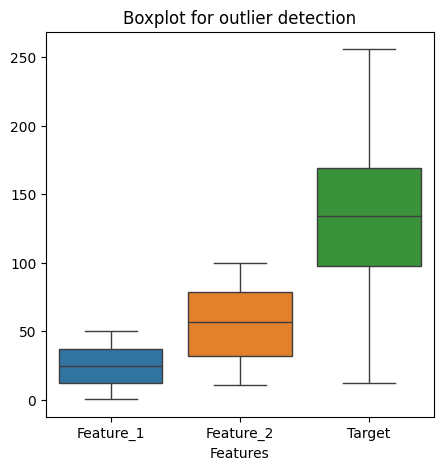

In [11]:
#check for outliers
plt.figure(figsize=(5,5))
sns.boxplot(data=data)
plt.title("Boxplot for outlier detection")
plt.xlabel("Features")
plt.show()


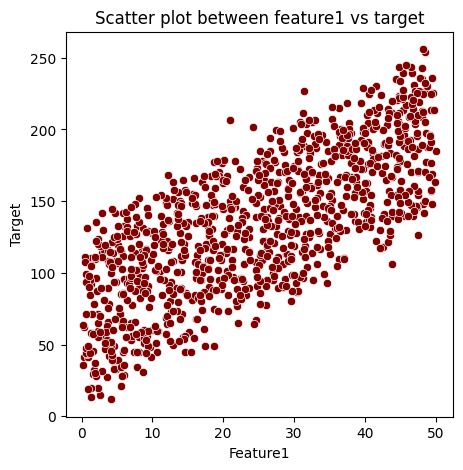

In [20]:
#step4:EDA
plt.figure(figsize=(5,5))
sns.scatterplot(x='Feature_1',y='Target',data=data,color='maroon')
plt.title("Scatter plot between feature1 vs target")
plt.xlabel("Feature1")
plt.ylabel("Target")
plt.show()

In [21]:
#step5:divide the dataset into features and target
x=data.drop("Target",axis=1)
y=data["Target"]


In [22]:
x

,Feature_1,Feature_2
0,18.727006,26.661964
1,47.535715,58.771085
2,36.599697,88.565125
3,29.932924,75.900240
4,7.800932,82.590503
...,...,...
995,4.579104,69.125964
996,45.865679,96.095316
997,6.840932,16.206221
998,47.511868,15.134925


In [23]:
y

0       75.032045
1      186.095787
2      200.512604
3      174.586253
4      132.746780
          ...    
995     93.751176
996    245.192409
997     62.434222
998    126.081746
999     84.427682
Name: Target, Length: 1000, dtype: float64

In [24]:
x.shape,y.shape

((1000, 2), (1000,))

In [29]:
#step6:splitting datasets into train and testing
from sklearn.model_selection import train_test_split#for splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [30]:
#step7
#1.(1.import model lib)
from sklearn.linear_model import LinearRegression
#load the model
model=LinearRegression()
#train the model using training data
model.fit(x_train,y_train)
#predict the target variable for the test set
y_pred=model.predict(x_test)

In [31]:
y_pred

array([165.30267131, 140.22983517, 164.04239661, 126.21150297,
       148.06003385, 157.13456198,  96.49042232, 127.42460859,
       103.56485267, 173.63283429, 204.43353053, 154.98883852,
       126.66383417,  99.60925032,  85.27976999, 112.00908159,
       195.0863718 , 111.89923294, 146.91654313,  54.70557701,
       181.93800542, 166.0788785 ,  38.59772984,  84.22598987,
       131.5812335 , 147.16137299, 201.09546041, 181.62622057,
       121.58627136, 145.61143287, 133.76687475, 202.57072389,
        49.55261908, 233.58057523, 134.14412894, 208.89248344,
       104.42584516, 202.73148621,  20.69872644, 125.25207962,
       140.44170622, 106.1499688 ,  79.00495519,  52.9144471 ,
       103.6559509 , 204.68840071, 155.74865985,  86.60949566,
        99.59297082,  98.72861809, 144.51276844, 105.55085022,
       226.97370656, 143.97652222, 167.42696409,  97.01531861,
       122.87379004,  43.23029449, 104.38492849, 139.69784544,
       131.45776658, 199.37146995, 106.63455852, 144.44

In [37]:
results=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
results

,Actual,Predicted
521,167.503605,165.302671
737,154.317860,140.229835
740,165.062247,164.042397
660,135.199609,126.211503
411,154.297221,148.060034
...,...,...
408,192.842078,193.480219
332,43.208241,43.234474
208,63.584023,46.932241
613,52.096982,62.019490


In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mse

100.35222719050995

In [33]:
#find the moel evaluation using r_squared score
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
r2

0.957500280399683

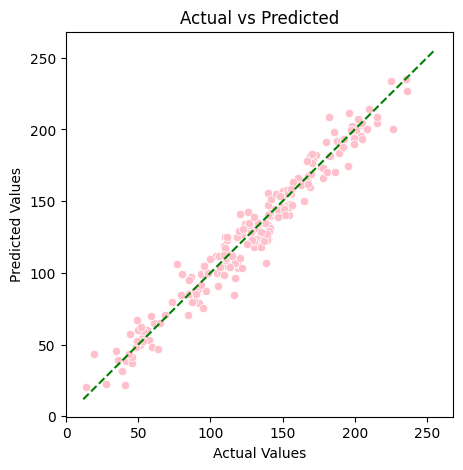

In [43]:
#diaplay best fit line for the test data
plt.figure(figsize=(5,5))
sns.scatterplot(x=y_test,y=y_pred,color='pink')
plt.plot([y.min(),y.max()],[y.min(),y.max()],'g--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()